Testing Geometric Centroid Over a Set of Convex Hulls functionality

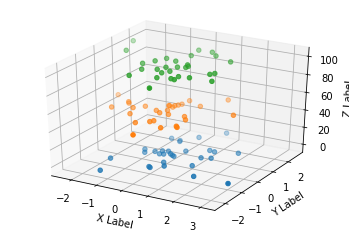

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import scipy 
from TowerCenterOfMass import convex_decomposition_center_of_mass_calculation 

lmap = lambda fn,it: list(map(fn,it))

#indices
x = 0
y = 1
z = 2 

n = 3 #number of convex hulls to plot stacked vertically
dz = 50 #vertical distance between hulls 
npoints = 30 #number of points per hull 
point_sets = [np.random.randn(npoints, 3) for i in range(n)] #set of set of points, each representing a hull 

#stack hulls vertically 
if n > 1: 
    for i,pset in enumerate(point_sets): 
        pset[:,z] += dz * i
        point_sets[i] = pset 

#Create all convex hulls. Compute COM of each and compute 
#a weighted sum of these COM's, normalized by the volume of 
#all hulls combined. 
createHull = lambda points: scipy.spatial.ConvexHull(points)
hulls = lmap(createHull, points)
com = convex_decomposition_center_of_mass_calculation(hulls)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot_hulls = lambda pset: ax.scatter(pset[:,x],
                                     pset[:,y],
                                     pset[:,z], 
                                     cmap="tab20", 
                                     marker='o')


lmap(plot_hulls, point_sets)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()